In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout, BatchNormalization
import seaborn as sns
import smogn
from sklearn.preprocessing import LabelEncoder


# 讀取 Excel 表
df1 = pd.read_excel('/Users/ccit0915/Desktop/迴歸分析/回歸分析期末報告/台中市預售屋買賣資料11204.xlsx')
df2 = pd.read_excel('/Users/ccit0915/Desktop/迴歸分析/回歸分析期末報告/台中市預售屋買賣資料11301.xlsx')
df3 = pd.read_excel('/Users/ccit0915/Desktop/迴歸分析/回歸分析期末報告/台中市預售屋買賣資料11302.xlsx')
df4 = pd.read_excel('/Users/ccit0915/Desktop/迴歸分析/回歸分析期末報告/台中市預售屋買賣資料11303.xlsx')


# 合併 DataFrame
df = pd.concat([df1, df2, df3, df4], ignore_index=True)

# 顯示合併後的 DataFrame
print(df)

                   /預售屋/土地位置建物門牌  /預售屋/土地移轉總面積平方公尺  /預售屋/土地移轉總面積平方公尺/#agg  \
0                     臺中市北屯區祥順一街            105.70                 105.70   
1      臺中市新社區水底寮段上水底寮小段213地號等18筆            113.73                 113.73   
2              臺中市豐原區鎌村路107巷102弄             20.89                  20.89   
3              臺中市豐原區鎌村路107巷102弄             20.74                  20.74   
4                      臺中市梧棲區中華路             24.02                  24.02   
...                          ...               ...                    ...   
29106          臺中市太平區東平段191-12地號             79.73                  79.73   
29107          臺中市太平區東平段191-13地號             82.44                  82.44   
29108             臺中市西屯區惠民段114地號              9.58                   9.58   
29109             臺中市西屯區惠民段114地號              9.58                   9.58   
29110             臺中市西屯區惠民段114地號              6.73                   6.73   

      /預售屋/主要用途 /預售屋/主要建材  /預售屋/交易年月日  /預售屋/交易年月日/#agg /預售屋/交易筆棟數  \
0     

In [2]:
df.drop(columns=['/預售屋/土地移轉總面積平方公尺/#agg'], inplace=True)
df.drop(columns=['/預售屋/交易年月日/#agg'], inplace=True)
df.drop(columns=['/預售屋/單價元平方公尺/#agg'], inplace=True)
df.drop(columns=['/預售屋/總價元/#agg'], inplace=True)
df.drop(columns=['/預售屋/總樓層數/#agg'], inplace=True)
df.drop(columns=['/預售屋/車位移轉總面積平方公尺/#agg'], inplace=True)
df.drop(columns=['/預售屋/車位總價元/#agg'], inplace=True)
df.drop(columns=['/預售屋/建物現況格局-房/#agg'], inplace=True)
df.drop(columns=['/預售屋/建物現況格局-廳/#agg'], inplace=True)
df.drop(columns=['/預售屋/建物現況格局-衛/#agg'], inplace=True)
df.drop(columns=['/預售屋/建物移轉總面積平方公尺/#agg'], inplace=True)
df.drop(columns=['/預售屋/土地位置建物門牌'], inplace=True)
df.drop(columns=['/預售屋/有無管理組織'], inplace=True)
df.drop(columns=['/預售屋/棟及號'], inplace=True)
df.drop(columns=['/預售屋/解約情形'], inplace=True)
df.drop(columns=['/預售屋/編號'], inplace=True)
df.drop(columns=['/預售屋/建案名稱'], inplace=True)
df.drop(columns=['/預售屋/建築完成年月'], inplace=True)
df.drop(columns=['/預售屋/備註'], inplace=True)
df.drop(columns=['/預售屋/非都市土地使用分區'], inplace=True)
df.drop(columns=['/預售屋/非都市土地使用編定'], inplace=True)
df.drop(columns=['/預售屋/交易年月日'], inplace=True)

In [3]:
# 檢查缺失值
missing_values = df.isnull().sum()

# 顯示有缺失值的欄位
missing_columns = missing_values[missing_values > 0]
print(missing_columns)

/預售屋/車位類別        2455
/預售屋/都市土地使用分區    1273
/預售屋/單價元平方公尺       10
/預售屋/鄉鎮市區          11
dtype: int64


In [4]:
# 刪除目標變數缺失值的10筆記錄
df = df.dropna(subset=["/預售屋/單價元平方公尺"])

# 將缺失值填入 "0" 表示無車位
df["/預售屋/車位類別"] = df["/預售屋/車位類別"].fillna("0")

# 以眾數填入缺失值
mode_value = df["/預售屋/都市土地使用分區"].mode()[0]
df["/預售屋/都市土地使用分區"] = df["/預售屋/都市土地使用分區"].fillna(mode_value)

# 刪除/預售屋/鄉鎮市區的缺失11筆記錄
df = df.dropna(subset=["/預售屋/鄉鎮市區"])

In [5]:
# 檢查缺失值
missing_values = df.isnull().sum()

# 顯示有缺失值的欄位
missing_columns = missing_values[missing_values > 0]
print(missing_columns)

Series([], dtype: int64)


In [6]:
df.drop(columns=['/預售屋/總價元'], inplace=True)

In [7]:
# 定義中英對應字典
column_name_map = {
    '/預售屋/土地移轉總面積平方公尺': 'Land Transfer Area (sqm)',
    '/預售屋/主要用途': 'Main Use',
    '/預售屋/主要建材': 'Main Materials',
    '/預售屋/交易筆棟數': 'Transaction Volume',
    '/預售屋/交易標的': 'Transaction Target',
    '/預售屋/車位移轉總面積平方公尺': 'Parking Transfer Area (sqm)',
    '/預售屋/車位總價元': 'Parking Price',
    '/預售屋/車位類別': 'Parking Type',
    '/預售屋/建物型態': 'Building Type',
    '/預售屋/建物現況格局-房': 'House Layout - Room',
    '/預售屋/建物現況格局-隔間': 'House Layout - Partition',
    '/預售屋/建物現況格局-衛': 'House Layout - Bathroom',
    '/預售屋/建物現況格局-廳': 'House Layout - Living Room',
    '/預售屋/建物移轉總面積平方公尺': 'Building Transfer Area (sqm)',
    '/預售屋/移轉層次': 'Transfer Level',
    '/預售屋/都市土地使用分區': 'Urban Land Use Zone',
    '/預售屋/單價元平方公尺': 'Unit Price (per sqm)',
    '/預售屋/鄉鎮市區': 'Township/District',
    '/預售屋/總樓層數': 'Total Floors'
}
df.rename(columns=column_name_map, inplace=True)

In [8]:
# 顯示更新後的列名
print(df.columns)

Index(['Land Transfer Area (sqm)', 'Main Use', 'Main Materials',
       'Transaction Volume', 'Transaction Target',
       'Parking Transfer Area (sqm)', 'Parking Price', 'Parking Type',
       'Building Type', 'House Layout - Room', 'House Layout - Partition',
       'House Layout - Bathroom', 'House Layout - Living Room',
       'Building Transfer Area (sqm)', 'Transfer Level', 'Urban Land Use Zone',
       'Unit Price (per sqm)', 'Township/District', 'Total Floors'],
      dtype='object')


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# 定義特徵和目標變數
X = df.drop(columns=['Unit Price (per sqm)'])  # 將目標變數從特徵集中移除
y = df['Unit Price (per sqm)']                # 定義目標變數

# 切割數據集，80% 用於訓練，20% 用於測試
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 初始化 LabelEncoder
label_encoder = LabelEncoder()

# 1. 標籤編碼
categorical_features = [
    "Main Use",
    "Main Materials",
    "Transaction Target",
    "House Layout - Partition",
    "Urban Land Use Zone"
]

for feature in categorical_features:
    # 對訓練集進行標籤編碼
    X_train[f"{feature}_encoded"] = label_encoder.fit_transform(X_train[feature].copy())
    # 測試集應用相同的映射，對未見過的類別填補為 -1
    X_test[f"{feature}_encoded"] = X_test[feature].map(
        lambda x: label_encoder.transform([x])[0] if x in label_encoder.classes_ else -1
    )

# 2. 頻率編碼
frequency_features = [
    "Transaction Volume",
    "Building Type",
    "Township/District", 
    "Transfer Level"
]

for feature in frequency_features:
    # 計算頻率映射表
    freq_map = X_train[feature].value_counts(normalize=True)
    # 對訓練集應用頻率映射
    X_train[f"{feature}_freq"] = X_train[feature].map(freq_map).fillna(1)  # 填補為 1
    # 對測試集應用頻率映射，對未知值填補為 1
    X_test[f"{feature}_freq"] = X_test[feature].map(freq_map).fillna(1)  # 填補為 1


# 3. 目標編碼（修正未知類別處理）
target_encoding_features = [("Parking Type", y_train)]

for feature, target in target_encoding_features:
    # 計算目標編碼的平均值
    target_map = X_train.join(target).groupby(feature)[target.name].mean()
    # 對訓練集進行目標編碼
    X_train[f"{feature}_encoded"] = X_train[feature].map(target_map)
    # 測試集目標編碼，對未知值填補為整體目標均值
    X_test[f"{feature}_encoded"] = X_test[feature].map(target_map).fillna(y_train.mean())

# 移除原始特徵以避免資料洩漏
X_train = X_train.drop(columns=categorical_features + frequency_features)
X_test = X_test.drop(columns=categorical_features + frequency_features)

In [10]:
X_train

,Land Transfer Area (sqm),Parking Transfer Area (sqm),Parking Price,Parking Type,House Layout - Room,House Layout - Bathroom,House Layout - Living Room,Building Transfer Area (sqm),Total Floors,Main Use_encoded,Main Materials_encoded,Transaction Target_encoded,House Layout - Partition_encoded,Urban Land Use Zone_encoded,Transaction Volume_freq,Building Type_freq,Township/District_freq,Transfer Level_freq,Parking Type_encoded
9311,26.11,72.98,3300000,坡道平面,3,2,1,165.62,15,1,2,1,0,0,0.091569,0.810373,0.006102,0.053283,146966.219231
17627,50.22,61.40,4000000,坡道平面,3,2,2,238.58,19,1,2,1,0,0,0.091569,0.810373,0.176006,0.063768,146966.219231
90,11.49,34.50,2400000,坡道平面,3,2,2,166.42,28,1,2,1,0,2,0.006746,0.810373,0.021055,0.015211,146966.219231
11881,17.79,23.79,500000,坡道機械,2,2,2,119.67,13,1,2,1,0,0,0.102827,0.810373,0.030165,0.050232,133167.600349
27960,16.33,36.63,1850000,坡道平面,3,2,2,163.07,15,1,2,1,0,2,0.551306,0.810373,0.095437,0.044775,146966.219231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,151.17,0.00,0,0,3,4,2,266.37,4,1,2,0,0,0,0.004211,0.054357,0.176006,0.054916,113623.502782
5398,62.81,0.00,0,0,4,3,2,140.08,3,1,2,0,0,0,0.012289,0.054357,0.069740,0.054916,113623.502782
862,14.49,52.26,4700000,坡道平面,3,2,2,250.46,28,1,5,1,0,2,0.023032,0.810373,0.146442,0.015727,146966.219231
15808,26.58,26.01,1850000,坡道平面,3,2,2,157.07,15,0,2,1,0,0,0.551306,0.810373,0.095437,0.044775,146966.219231


In [11]:
X_train.drop(columns=['Parking Type'], inplace=True)
X_test.drop(columns=['Parking Type'], inplace=True)

In [12]:
X_train

,Land Transfer Area (sqm),Parking Transfer Area (sqm),Parking Price,House Layout - Room,House Layout - Bathroom,House Layout - Living Room,Building Transfer Area (sqm),Total Floors,Main Use_encoded,Main Materials_encoded,Transaction Target_encoded,House Layout - Partition_encoded,Urban Land Use Zone_encoded,Transaction Volume_freq,Building Type_freq,Township/District_freq,Transfer Level_freq,Parking Type_encoded
9311,26.11,72.98,3300000,3,2,1,165.62,15,1,2,1,0,0,0.091569,0.810373,0.006102,0.053283,146966.219231
17627,50.22,61.40,4000000,3,2,2,238.58,19,1,2,1,0,0,0.091569,0.810373,0.176006,0.063768,146966.219231
90,11.49,34.50,2400000,3,2,2,166.42,28,1,2,1,0,2,0.006746,0.810373,0.021055,0.015211,146966.219231
11881,17.79,23.79,500000,2,2,2,119.67,13,1,2,1,0,0,0.102827,0.810373,0.030165,0.050232,133167.600349
27960,16.33,36.63,1850000,3,2,2,163.07,15,1,2,1,0,2,0.551306,0.810373,0.095437,0.044775,146966.219231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,151.17,0.00,0,3,4,2,266.37,4,1,2,0,0,0,0.004211,0.054357,0.176006,0.054916,113623.502782
5398,62.81,0.00,0,4,3,2,140.08,3,1,2,0,0,0,0.012289,0.054357,0.069740,0.054916,113623.502782
862,14.49,52.26,4700000,3,2,2,250.46,28,1,5,1,0,2,0.023032,0.810373,0.146442,0.015727,146966.219231
15808,26.58,26.01,1850000,3,2,2,157.07,15,0,2,1,0,0,0.551306,0.810373,0.095437,0.044775,146966.219231


In [13]:
# 輸出 DataFrame 到 Excel 檔案
#X_train.to_excel("processed_data.xlsx", index=False)

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best Parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best Score (MSE): 64571615.704920895


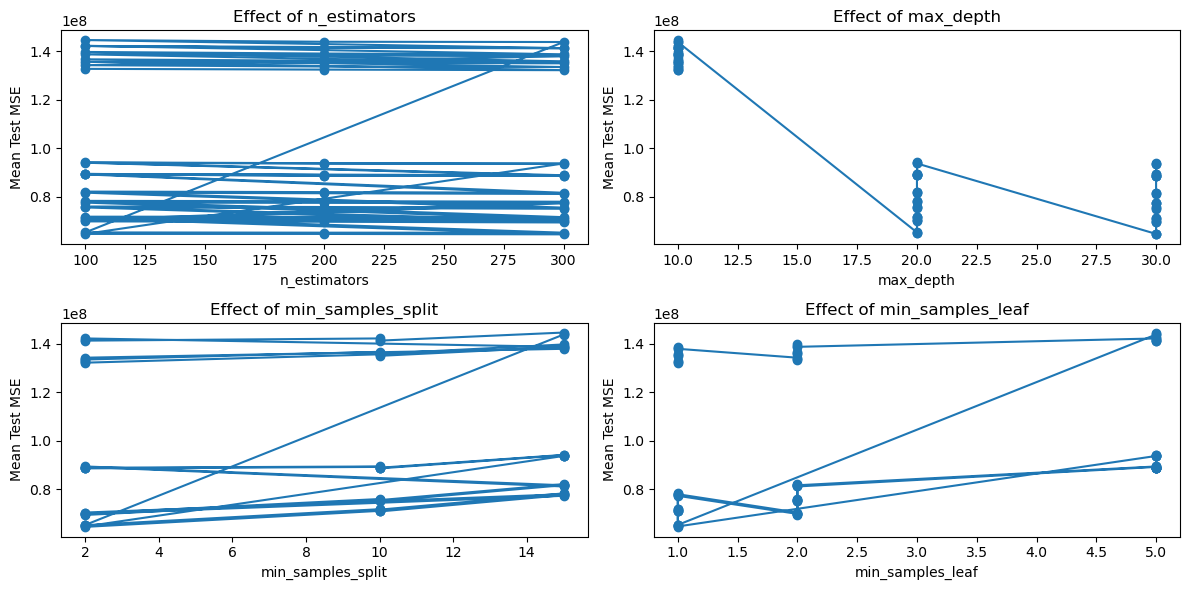

In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

feature_name_map = {
    'Land Transfer Area (sqm)': '土地移轉總面積平方公尺',
    'Parking Transfer Area (sqm)': '車位移轉總面積平方公尺',
    'Parking Price': '車位總價元',
    'House Layout - Room': '建物現況格局-房',
    'House Layout - Bathroom': '建物現況格局-衛',
    'House Layout - Living Room': '建物現況格局-廳',
    'Building Transfer Area (sqm)': '建物移轉總面積平方公尺',
    'Total Floors': '總樓層數',
    'Main Use_encoded': '主要用途 (編碼)',
    'Main Materials_encoded': '主要建材 (編碼)',
    'Transaction Target_encoded': '交易標的 (編碼)',
    'House Layout - Partition_encoded': '建物現況格局-隔間 (編碼)',
    'Urban Land Use Zone_encoded': '都市土地使用分區 (編碼)',
    'Transaction Volume_freq': '交易筆棟數 (頻率)',
    'Building Type_freq': '建物型態 (頻率)',
    'Township/District_freq': '鄉鎮市區 (頻率)',
    'Parking Type_encoded': '車位類別 (編碼)',
    'Transfer Level_freq': '移轉層次 (頻率)'
}

# 律定變數Ｘ與Ｙ
X = X_train[list(feature_name_map.keys())]
y = y_train

# 定義樣本權重 (如果有需要)
# weights = ...  # 應定義 sample_weight

# 創建隨機森林回歸器
rf = RandomForestRegressor(random_state=42)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 10, 15],
    'min_samples_leaf': [1, 2, 5]
}

# 網格搜索
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)  

# 最佳參數和最佳分數
best_params = grid_search.best_params_
best_score = -grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score (MSE):", best_score)

# 繪製圖表
results = grid_search.cv_results_
mean_test_scores = -results['mean_test_score']
params = results['params']

n_estimators = [params[i]['n_estimators'] for i in range(len(params))]
max_depth = [params[i]['max_depth'] for i in range(len(params))]
min_samples_split = [params[i]['min_samples_split'] for i in range(len(params))]
min_samples_leaf = [params[i]['min_samples_leaf'] for i in range(len(params))]

plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.plot(n_estimators, mean_test_scores, 'o-')
plt.xlabel('n_estimators')
plt.ylabel('Mean Test MSE')
plt.title('Effect of n_estimators')

plt.subplot(2, 2, 2)
plt.plot(max_depth, mean_test_scores, 'o-')
plt.xlabel('max_depth')
plt.ylabel('Mean Test MSE')
plt.title('Effect of max_depth')

plt.subplot(2, 2, 3)
plt.plot(min_samples_split, mean_test_scores, 'o-')
plt.xlabel('min_samples_split')
plt.ylabel('Mean Test MSE')
plt.title('Effect of min_samples_split')

plt.subplot(2, 2, 4)
plt.plot(min_samples_leaf, mean_test_scores, 'o-')
plt.xlabel('min_samples_leaf')
plt.ylabel('Mean Test MSE')
plt.title('Effect of min_samples_leaf')

plt.tight_layout()
plt.show()

In [15]:
# 找出 X_test 中的 NaN 值的索引
nan_indices = X_test[X_test.isna().any(axis=1)].index

# 顯示包含 NaN 值的行
print("包含 NaN 值的行索引:", nan_indices.tolist())
print("\n包含 NaN 值的具體數據:\n", X_test.loc[nan_indices])

包含 NaN 值的行索引: []

包含 NaN 值的具體數據:
 Empty DataFrame
Columns: [Land Transfer Area (sqm), Parking Transfer Area (sqm), Parking Price, House Layout - Room, House Layout - Bathroom, House Layout - Living Room, Building Transfer Area (sqm), Total Floors, Main Use_encoded, Main Materials_encoded, Transaction Target_encoded, House Layout - Partition_encoded, Urban Land Use Zone_encoded, Transaction Volume_freq, Building Type_freq, Township/District_freq, Transfer Level_freq, Parking Type_encoded]
Index: []


In [16]:
X_test = X_test.dropna()
y_test = y_test[X_test.index]  # 同步刪除 y_test 中的對應行

In [17]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 最佳參數組合
best_params = grid_search.best_params_
print("最佳參數組合:", best_params)

# 使用最佳參數組合進行預測
best_model = grid_search.best_estimator_
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# 評估模型
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
# 訓練集樣本數和特徵數
n_train = X_train.shape[0]  # 訓練集樣本數
p = X_train.shape[1]        # 特徵數

# 測試集樣本數
n_test = X_test.shape[0]    # 測試集樣本數

#  訓練集Ra²
train_ra2 = 1 - (1 - train_r2) * (n_train - 1) / (n_train - p - 1)

#  測試集R²
test_ra2 = 1 - (1 - test_r2) * (n_test - 1) / (n_test - p - 1)

print("Train MSE:", train_mse)
print("Train RMSE:", train_rmse)
print("Train MAE:", train_mae)
print("Train R^2 Score:", train_r2)
print("Train Adjusted R²:", train_ra2)
print("Test MSE:", test_mse)
print("Test RMSE:", test_rmse)
print("Test MAE:", test_mae)
print("Test R^2 Score:", test_r2)
print("Test Adjusted R²:", test_ra2)

最佳參數組合: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Train MSE: 7377247.825623375
Train RMSE: 2716.108949512772
Train MAE: 1575.9182778628751
Train R^2 Score: 0.9965382833843573
Train Adjusted R²: 0.996535603691454
Test MSE: 50247838.55353703
Test RMSE: 7088.570981060783
Test MAE: 4040.520900975035
Test R^2 Score: 0.9767504493078879
Test Adjusted R²: 0.976678295529878


In [18]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import category_encoders as ce
import numpy as np
import pandas as pd

# 對數據進行標準化處理
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # 對訓練集進行標準化
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)  

# 初始化隨機森林回歸模型
rf_model = RandomForestRegressor(**best_params)  # 使用最佳參數組合

# 進行交叉驗證
scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=5, scoring='r2')

# 輸出交叉驗證結果
print("Cross-validation R^2 scores:", scores)
print("Mean cross-validation R^2 score:", np.mean(scores))

Cross-validation R^2 scores: [0.97349179 0.97259584 0.97261586 0.97468275 0.96794318]
Mean cross-validation R^2 score: 0.9722658833038972


                             Feature  Importance
15            Township/District_freq    0.630936
2                      Parking Price    0.165079
7                       Total Floors    0.057737
0           Land Transfer Area (sqm)    0.035090
6       Building Transfer Area (sqm)    0.022503
1        Parking Transfer Area (sqm)    0.021879
16              Parking Type_encoded    0.013359
12       Urban Land Use Zone_encoded    0.013129
13           Transaction Volume_freq    0.008291
3                House Layout - Room    0.007231
5         House Layout - Living Room    0.005557
14                Building Type_freq    0.005342
4            House Layout - Bathroom    0.004414
8                   Main Use_encoded    0.003356
9             Main Materials_encoded    0.003279
17               Transfer Level_freq    0.001804
11  House Layout - Partition_encoded    0.000840
10        Transaction Target_encoded    0.000175


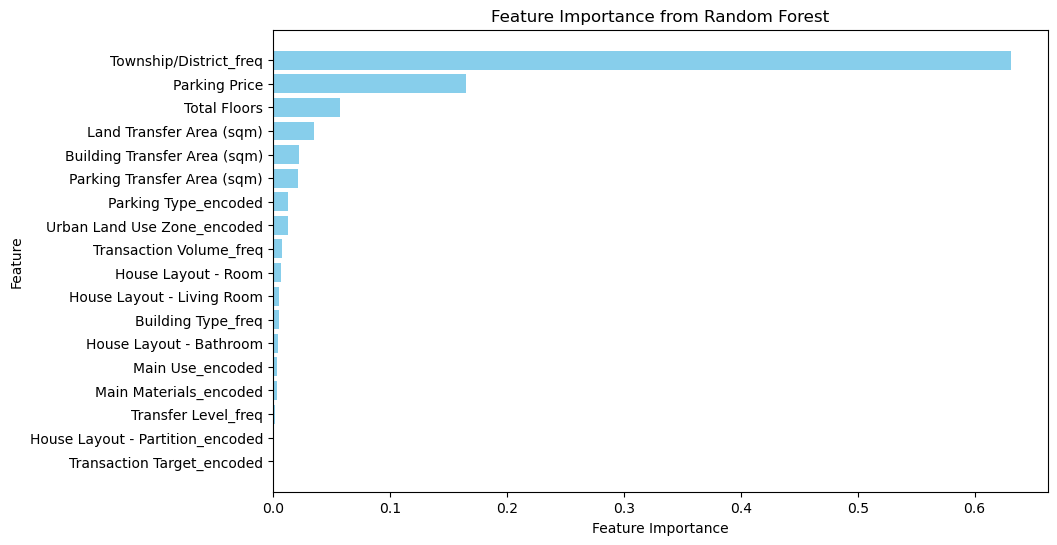

In [19]:
# 特征重要性
feature_importances = best_model.feature_importances_
features = X.columns

# 創建特徵重要性的 DataFrame
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# 按重要性排序
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# 顯示特徵重要性
print(feature_importance_df)

# 可視化特徵重要性
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis()
plt.show()

In [20]:
from sklearn.metrics import r2_score

#  R²（決定係數）
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

#  R²（Ra²）
n_train = len(y_train)  # 訓練集樣本數量
n_test = len(y_test)    # 測試集樣本數量
p = X_train.shape[1]    # 特徵數量

#  訓練集Ra²
train_ra2 = 1 - (1 - train_r2) * (n_train - 1) / (n_train - p - 1)

#  測試集R²
test_ra2 = 1 - (1 - test_r2) * (n_test - 1) / (n_test - p - 1)

# 输出结果
print("Train R²:", train_r2)
print("Test R²:", test_r2)
print("Train Adjusted R²:", train_ra2)
print("Test Adjusted R²:", test_ra2)

Train R²: 0.9965382833843573
Test R²: 0.9767504493078879
Train Adjusted R²: 0.996535603691454
Test Adjusted R²: 0.976678295529878


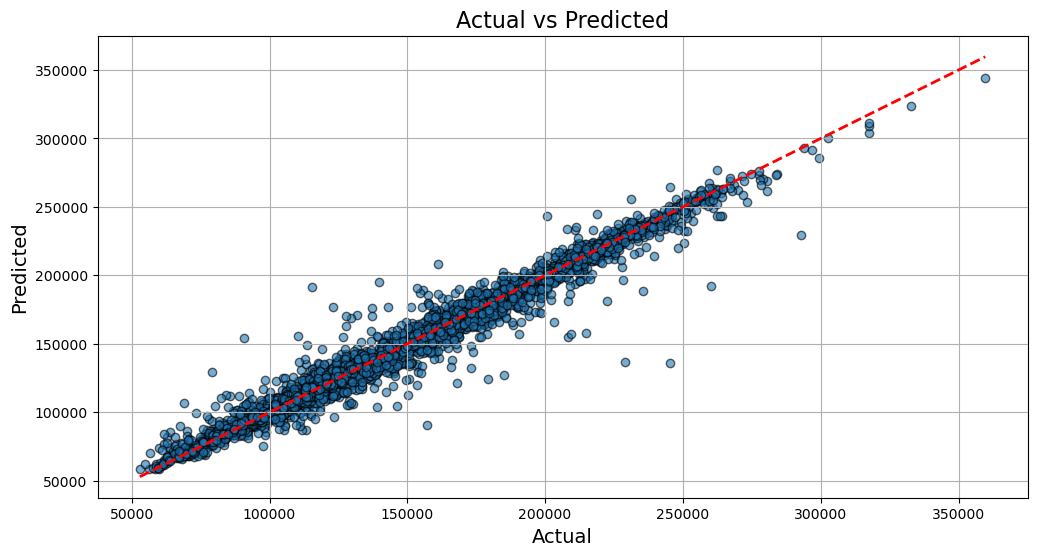

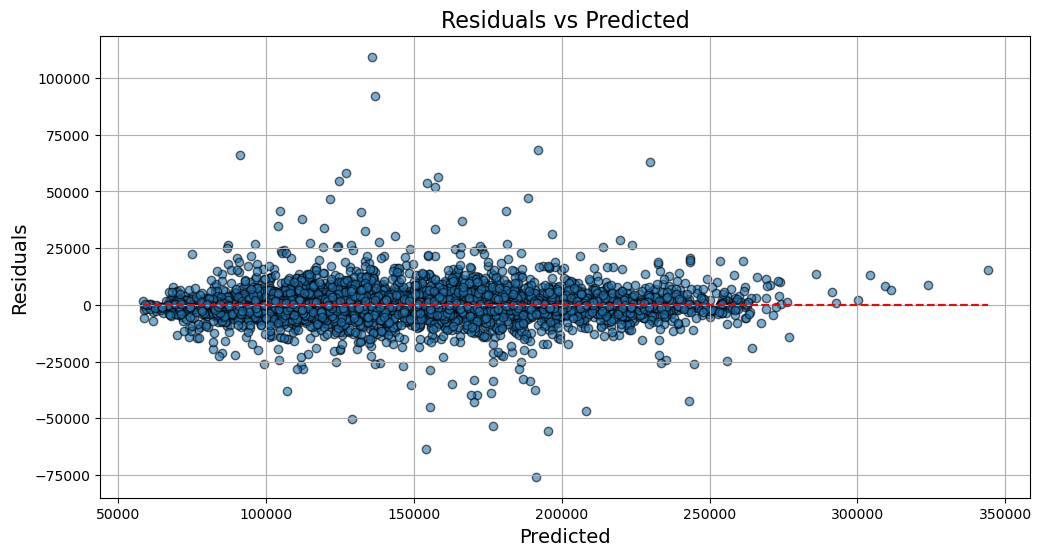

[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   3.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   3.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   6.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=15, n_estimators=100; total time=   3.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=   9.2s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   9.3s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=15, n_estimators=200; total time=   6.2s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   3.0s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=2, n_estimators=300; total time=   9.2s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=15, n_estimators=100; tot

In [21]:
# 進行預測
y_test_pred = best_model.predict(X_test)

# 計算殘差
residuals = y_test.values - y_test_pred

# 繪製殘差對實際值的散佈圖
plt.figure(figsize=(12, 6))
plt.scatter(y_test.values, y_test_pred, edgecolors=(0, 0, 0), alpha=0.6)
plt.plot([min(y_test.values), max(y_test.values)], [min(y_test.values), max(y_test.values)], 'r--', lw=2)
plt.xlabel('Actual', fontsize=14)
plt.ylabel('Predicted', fontsize=14)
plt.title('Actual vs Predicted', fontsize=16)
plt.grid(True)
plt.show()

# 繪製殘差圖
plt.figure(figsize=(12, 6))
plt.scatter(y_test_pred, residuals, edgecolors=(0, 0, 0), alpha=0.6)
plt.hlines(0, min(y_test_pred), max(y_test_pred), colors='r', linestyles='dashed')
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.title('Residuals vs Predicted', fontsize=16)
plt.grid(True)
plt.show()

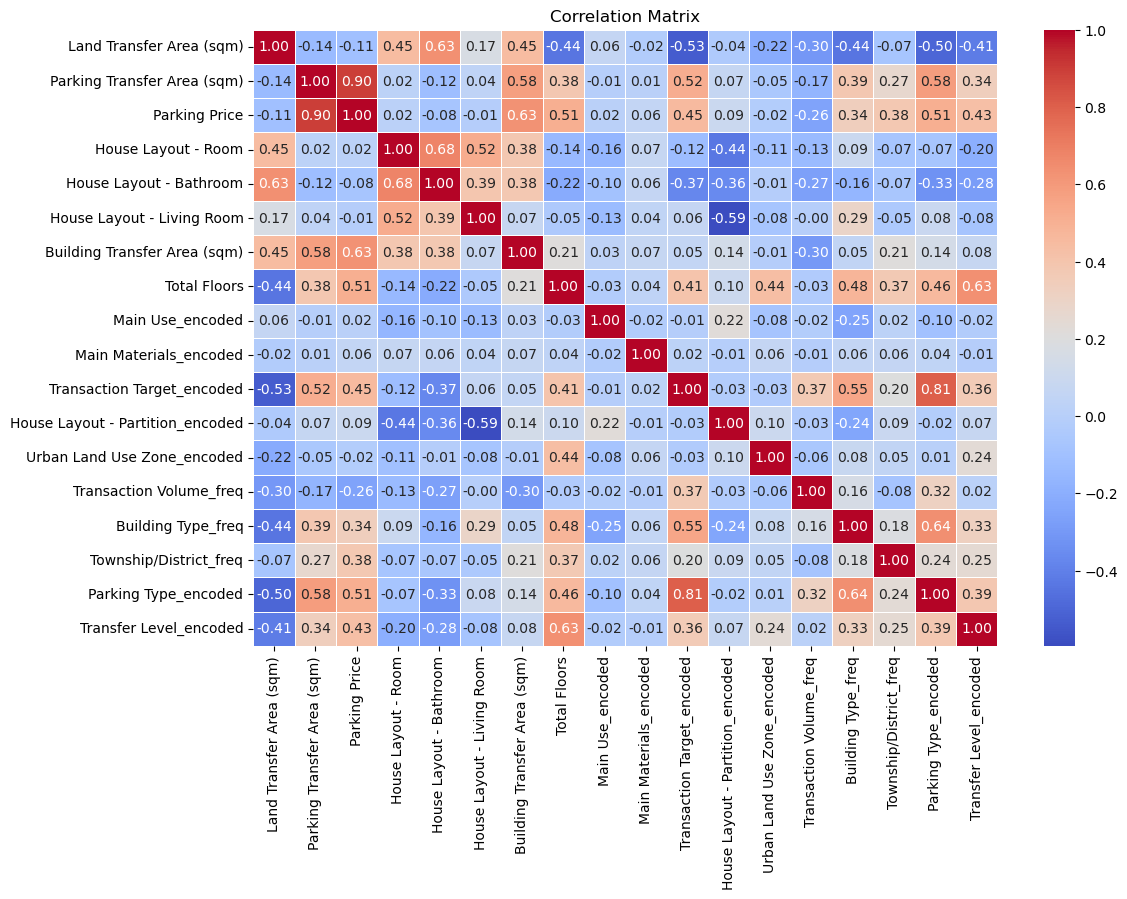

[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   3.8s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   3.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=  10.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=   9.6s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   9.4s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=15, n_estimators=200; total time=   6.2s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   3.4s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=2, n_estimators=300; total time=  10.0s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=15, n_estimators=100; total time=   3.3s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=15, n_estimators=200; tot

In [412]:
import seaborn as sns
import matplotlib.pyplot as plt

# 計算相關係數矩陣
correlation_matrix = X_train.corr()

# 繪製相關係數矩陣熱力圖
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()